# **Music Recommendation System**

## **Context:**

Online music streaming platforms like **Spotify** have plenty of songs in their repositories. If we can build a **recommendation system** to recommend songs to the users based on their historical interactions with songs, this would improve customer satisfaction. Increased customer satisfaction will **increase the revenue of the company.** The techniques that we will learn here will not only be limited to songs but can be any item for which you can build a recommendation system.

## **Problem Statement:**

In this project, we will build a music recommendation system for the [Million Song Dataset](http://millionsongdataset.com/). Our motivation consists of building an information filter to maintain the attention of users of a Music Platform because of information overload and decisions that they make, avoiding attrition of users using the Music Platform, this is of course undesirable. 

The constraints that we main follows given the data that we have, it's the provision of the characteristics of a small dataset constituted mainly of a small number of user_id and song_id of the universe of possibilities of the Million Song Dataset.

There are many types of recommender systems in use today, so a major component of the project will be in benchmarking models to find the more appropriate recommendation system to propose songs for a user based on the user’s listening activity of a given song set.


## **Objective:**

Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

## **Data Dictionary:**

The core dataset is the Taste Profile Subset released by The Echo Nest as part of the [Million Song Dataset](http://millionsongdataset.com/). There are two csv files in this dataset count_data and song_data. song_data file of 1,000,000 rows of songs contains the details about the song id, titles, release, artist name, and the year of release. The count_data file of 2,000,000 rows contains the user id, song id, and the play count of users.

**song_data**
* **song_id:** A unique id given to every song
* **title:** Title of the song
* **Release:** Name of the released album
* **Artist_name:** Name of the artist
* **year:** Year of release

**count_data**
* **user _id:** A unique id given to the user
* **song_id:** A unique id given to the song
* **play_count:** Number of times the song was played


### **Importing Libraries and the Dataset**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

from sklearn.preprocessing import LabelEncoder  # Encode target labels with value between 0 and n_classes-1

### **Load the dataset**

In [2]:
# Importing the datasets
# count_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project_Music_Recommendation_System/Million_Songs_Dataset/count_data.csv')
# song_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project_Music_Recommendation_System/Million_Songs_Dataset/song_data.csv')
count_df = pd.read_csv('./Million_Songs_Dataset/count_data.csv')
song_df = pd.read_csv('./Million_Songs_Dataset/song_data.csv')

### **Understanding the data by viewing a few observations**

In [3]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [4]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [5]:
# See the info of the count_df data
count_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  2000000 non-null  int64 
 1   user_id     2000000 non-null  object
 2   song_id     2000000 non-null  object
 3   play_count  2000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [6]:
# display the dimension of the count_df data
count_df.shape

(2000000, 4)

In [7]:
count_df.describe()

,Unnamed: 0,play_count
count,2.000000e+06,2.000000e+06
mean,9.999995e+05,3.045485e+00
std,5.773504e+05,6.579720e+00
min,0.000000e+00,1.000000e+00
25%,4.999998e+05,1.000000e+00
50%,9.999995e+05,1.000000e+00
75%,1.499999e+06,3.000000e+00
max,1.999999e+06,2.213000e+03


In [8]:
# See the info of the song_df data
song_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [9]:
# display the dimension of the song_df data
song_df.shape

(1000000, 5)

In [10]:
song_df.describe()

,year
count,1000000.000000
mean,1030.325652
std,998.745002
min,0.000000
25%,0.000000
50%,1969.000000
75%,2002.000000
max,2011.000000


#### 1. **Observations and Insights for count_df:**

* The dataframe count_df have 2,000,000 observations for user_id, song_id, play_count with no missing values. The data types of the columns are user_id, song_id, are strings and play_count is an integer.
* Column 'Unnamed: 0' contains the index of the count_df dataset, but we don't need an index column for our analysis. Hence, we can drop this column by considering features that add value to the model.
* The standard deviation of play_count is 6.5797 indicating that there is high variability in the dataset and most data points slightly deviate from the mean. The mean of the play_count column is 3.045
* The play_count is between '1.0' and '2213.0' for the available data. The typical rating in the dataset i.e. the median or 50th Percentile is '1.0', '1.0' in Q1 or 25th Percentile, and '3.0' in Q3 or 75th Percentile. That's behavior indicates thta the dataset highly skweed towards play_count '1.0'.

#### 2.  **Observations and Insights for song_df:**

* The dataframe song_df have 1,000,000 observations for song_id, title, release, artist_name, year with missing values in title and release. The data types of the columns are song_id, title, release, artist_name are strings and year is an integer.
* We can observe that the year column goes from 1969 to 2011, the min value is 0 and the max value is 2011. The median for the years is 1969, and we can see that the average is low at 1030 indicating that there're songs with a year equal to 0 decreasing the mean value.

#### 3. **General Observations and Insights:**

* pandas .info() method for large datasets don't provide not null counts. So we can pass optional arguments verbose=True and show_counts=True to the .info() method to output information for all of the columns
* we can merge by song_id to join both datasets into one, droping duplicate records.
* Overall, we can observe that the amount of data is significant and that there are enough records to create a music recommendation system that allows recommending songs to users.

In [11]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [12]:
df.shape

(2000000, 7)

In [13]:
df.isnull().values.any()

False

*   The resulting dataframe post left join of count_df and song_df data on "song_id" have 2,000,000 rows and 7 columns
*   There are not missing values due to df_final.isnull().values.any() returns False indicating that all columns in the DataFrame are complete.

In [14]:
df.head(100)

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
95,e006b1a48f466bf59feefed32bec6494495a4436,SOEGIYH12A6D4FC0E3,3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
96,e006b1a48f466bf59feefed32bec6494495a4436,SOEKGDE12AB0182795,4,Rhyme & Reason,Listener Supported,DAVE MATTHEWS BAND,1994
97,e006b1a48f466bf59feefed32bec6494495a4436,SOFRQTD12A81C233C0,3,Sehr kosmisch,Musik von Harmonia,Harmonia,0
98,e006b1a48f466bf59feefed32bec6494495a4436,SOIICEQ12A6D4F7FE0,1,Someone Else's Arms,Everglow_ The,Mae,2005


### **As the user_id and song_id are encrypted we can take advantage of it by encoding user_id and song_id values to numeric features**

In [15]:
# Apply label encoding for "user_id" and "song_id"

le = LabelEncoder() # Instantiating LabelEncoder from sklearn

df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

In [16]:
df.head(100)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
95,66678,1664,3,Horn Concerto No. 4 in E flat K495: II. Romanc...,Mozart - Eine kleine Nachtmusik,Barry Tuckwell/Academy of St Martin-in-the-Fie...,0
96,66678,1731,4,Rhyme & Reason,Listener Supported,DAVE MATTHEWS BAND,1994
97,66678,2220,3,Sehr kosmisch,Musik von Harmonia,Harmonia,0
98,66678,3305,1,Someone Else's Arms,Everglow_ The,Mae,2005


In [17]:
# Display total number of unique user_id
print('Total number of unique user_id: ', df.user_id.nunique())

Total number of unique user_id:  76353


In [18]:
# Display total number of unique song_id
print('Total number of unique song_id: ', df.song_id.nunique())

Total number of unique song_id:  10000


In [19]:
# Display total number of user_id, song_id and play_count in the dataset
print('Total number of play_count in the dataset: ', df[df['play_count'] > 0].shape)

Total number of play_count in the dataset:  (2000000, 7)


In [20]:
df.shape

(2000000, 7)

In [21]:
# Fraction known play_count 
print(76353*10000)
print('Fraction of known play_count: ', 2000000 / (76353*10000))

763530000
Fraction of known play_count:  0.0026194124657839247


### **As the data also contains users who have listened to very few songs and vice versa, we propose to filter the data so that it contains users who have listened to a good count of songs and vice versa**

In [22]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [23]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [24]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [25]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [26]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final.play_count <= 5]

In [27]:
# Check the shape of the data
df_final.shape

(117876, 7)

#### **Observations and Insights:**

* The constraints that we mainly follow given the subset that we have post filtering, it's the provision of the characteristics of a small dataset of 117,876 played songs (user_id and song_id pairs) of the universe of possibilities of the Million Song Dataset.

* In the current project, as the user_id and song_id are given in the text format, it becomes necessary to convert them to numbers so that we can pass them to the algorithms.

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**


In [28]:
# Display total number of unique user_id
print('Total number of unique user_id: ', df_final.user_id.nunique())

Total number of unique user_id:  3155


In [29]:
# Display total number of unique song_id
print('Total number of unique song_id: ', df_final.song_id.nunique())

Total number of unique song_id:  563


In [30]:
# Display total number of unique artists
print('Total number of unique artists: ', df_final.artist_name.nunique())

Total number of unique artists:  232


#### **Observations and Insights:**

* There are **3155 unique user**s in the "Million Song Dataset" dataset.
* There are **563 unique songs** in the dataset.
* As per the number of unique users and songs, there is a **possibility of 3155 * 563 = 1,776,265 listened songs** in the dataset. But we only have 117,876 played songs, i.e., not every user has listened every song in the dataset, which is quite understandable. This creates the possibility of building a recommendation system to recommend songs to the users which they have not interacted with.
* **For user engagement,** we might add data from the analytics of the music platform to the current dataset. However, adding web-scraped data to the original data of the current project will alter the results and affect the novelty of the problem itself. Keeping this in mind, it is advisable to proceed with the given data only. So, we don't have access to important information that would model the interactions between user songs, such as:
  * Listening time and average listening duration
  * Likes, Dislikes
  * Comments
  * ...

### **Let's find out about the most interacted songs and interacted users**

#### **Is there any song that has been interacted with more than once by the same user?**

In [31]:
# Finding the frequency of songs played by each user
df_final.groupby(['user_id', 'song_id']).count()

play_count  title  release  artist_name  year
user_id song_id                                               
11      5158              1      1        1            1     1
        8019              1      1        1            1     1
        8882              1      1        1            1     1
17      314               1      1        1            1     1
        703               1      1        1            1     1
...                     ...    ...      ...          ...   ...
76342   5375              1      1        1            1     1
        7889              1      1        1            1     1
        8494              1      1        1            1     1
        9942              1      1        1            1     1
76347   5879              1      1        1            1     1

[117876 rows x 5 columns]

In [32]:
# Finding the sum of ratings count by user-song pair
df_final.groupby(['user_id', 'song_id']).count()['play_count'].sum()

117876

In [33]:
df_final.duplicated(subset=['user_id', 'song_id']).sum()

0

### **Most interacted songs**

In [34]:
# Counting the number of people who have listened a certain song
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Also, out of these 751 interactions, we need to consider the distribution of play_count as well to check whether this song is the most liked or most disliked song.

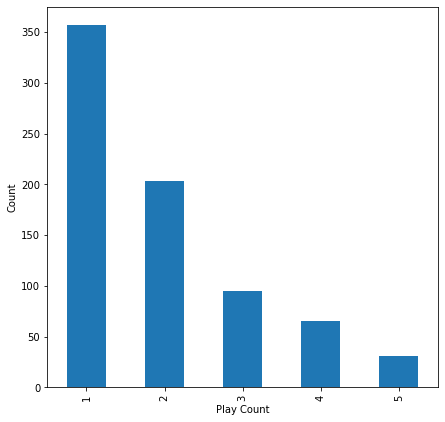

In [35]:
# Plotting distributions of play_count for 751 interactions with song_id 8582

# Let us fix the size of the figure
plt.figure(figsize = (7, 7))

df_final[df_final['song_id'] == 8582]['play_count'].value_counts().plot(kind = 'bar')

# This gives a label to the variable on the x-axis
plt.xlabel('Play Count')

# This gives a label to the variable on the y-axis
plt.ylabel('Count')

# This displays the plot
plt.show()

In [36]:
df_final.groupby('song_id')['play_count'].agg(['count', 'median', 'mean']).sort_values(by='count', ascending = False)

,count,median,mean
song_id,,,
8582,751,2.0,1.948069
352,748,2.0,2.184492
2220,713,2.0,2.220196
1118,662,1.0,1.817221
4152,652,2.0,1.930982
...,...,...,...
9048,103,1.0,1.970874
6450,102,1.0,2.578431
990,101,1.0,1.732673


#### **Observations and Insights:**

* We can see that the song 8582 has been listened to by the majority of users typically 2 times.
* There can be songs with very high interactions, but the play_count 1 and 2 may be much higher than the play_count 4 or 5 which would imply that the song is known by the majority of the user, but they don't necessarily like that song.

### **Most interacted users**

In [37]:
# Counting the number of movies each user has watched
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**

* The sum is equal to the total number of observations, which implies that there is only one interaction between a pair of a song and a user.
* The song with song_id 8582 has been interacted by most users which is 751 times.
* But still, there is a possibility of 3155-751 = 2404 more interactions as we have 3155 unique users in our dataset. For those 2404 remaining users, we can build a recommendation system to predict who is most likely to interact with this song.
* The user with user_id: 61472 has interacted with the most number of songs, i.e., 243 times.
* But still, there is a possibility of 320 more interactions as we have 563 unique songs in our dataset. For those 320 remaining songs, we can build a recommendation system to predict which songs are most likely to be listened by the user 61472.

### **What is the distribution of the user-song interactions in this dataset?**

In [38]:
# Finding user-song interactions distribution
song_count = df_final.groupby('user_id').count()[['song_id']]

Text(0.5, 0, 'Number of unique songs a user listens to')

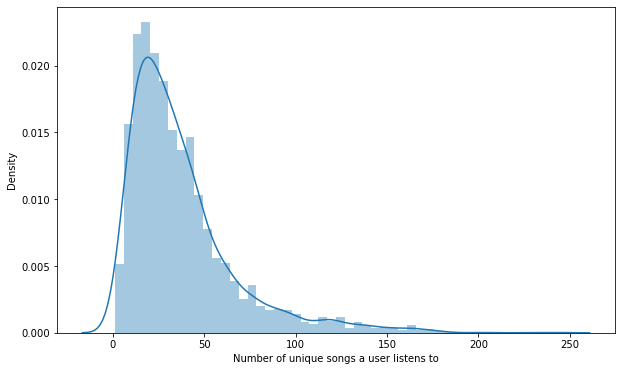

In [39]:
fig1 = plt.figure(figsize=(10,6))

sns.distplot(song_count)
plt.xlabel("Number of unique songs a user listens to")

### **Observations:**

* The plot shows that most users listen to less than 200 songs. Let's take a closer look at the box plot of this distribution.

Text(0.5, 1.0, 'Boxplot of Total Songs a User Has Listened to')

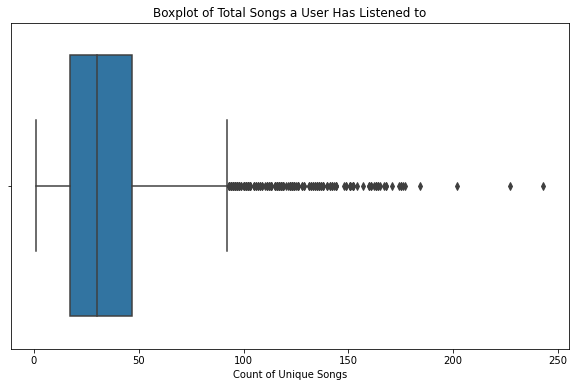

In [40]:
fig2 = plt.figure(figsize=(10,6))

sns.boxplot(song_count['song_id'])
plt.xlabel("Count of Unique Songs")
plt.title("Boxplot of Total Songs a User Has Listened to")

### **Observations:**

* Since we are building a recommendation system, outliers are treated differently as it is valid data of human activity. Also, the percentage of users that have only listened to one song is low so we can conclude that our data is valid for our model.

## **Songs played in a year**


In [41]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


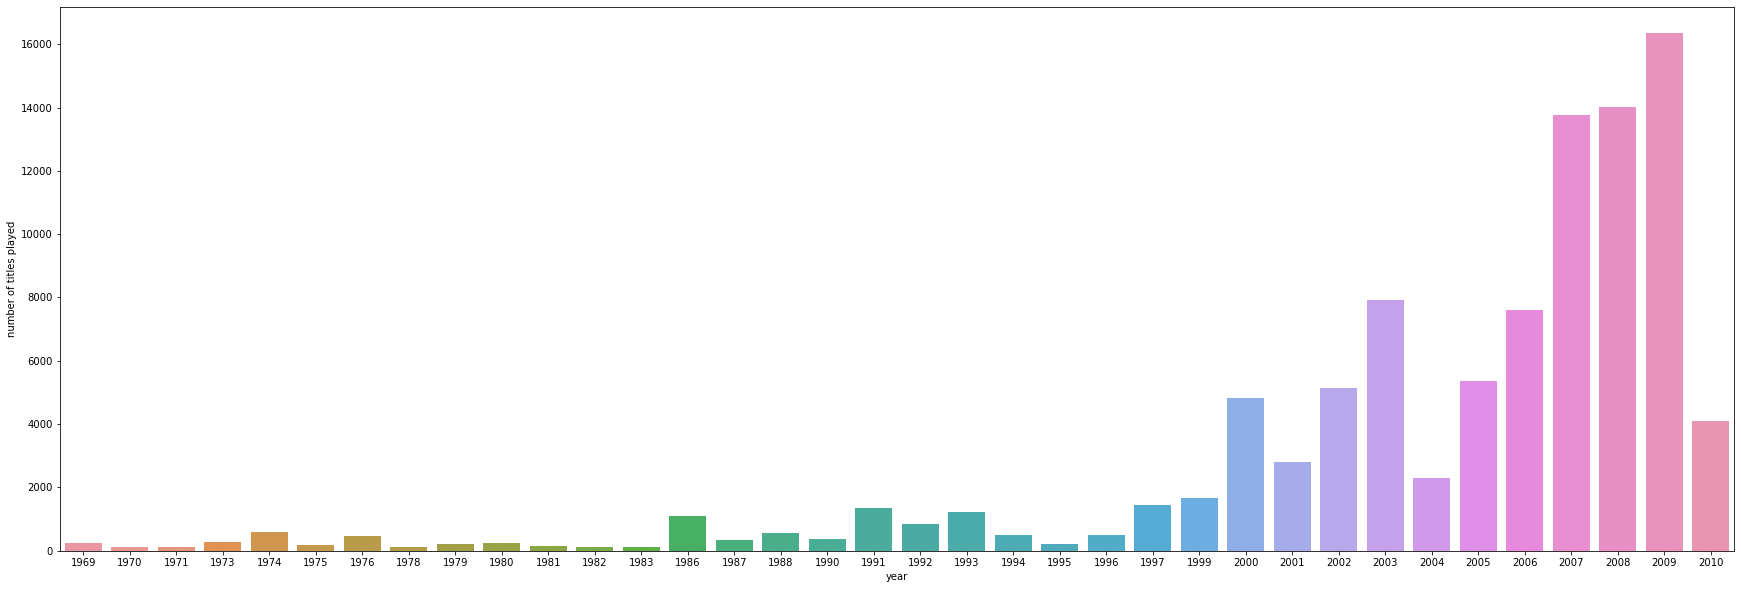

In [42]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** # 

* 2009 is the year with the highest number of titles played with a number of 16351 reproductions, followed by 2008 with 14031 reproductions, and 2007 with 13750 reproductions.
* We can observe that the Million Song Dataset constains titles played from 1969 to 2010.
* We can see that the majority of titles played are modern, we can build a recommendation system to predict which songs are most likely to be listened from year 2000 to 2010. 
* It is highly likely that users are young and know old songs, but that they like songs from the year 2000 onwards. This creates the possibility of building a recommendation system to recommend songs to the users which they have not interacted with.

## **Proposed approach**

In this project we will build a music recommendation system for the Million Song Dataset to recommend songs to users based on their previous listening activity using six different algorithms. They are as follows:
1.	Rank-based using averages
2.	User-User similarity-based collaborative filtering
3.	Item-Item similarity-based collaborative filtering
4.	Model-based collaborative filtering - Matrix Factorization
5.	clustering-based recommendation systems
6.	content-based recommendation systems

To achieve that goal, we first explored the **Million Song Dataset** to understand the data and get insights, pre-process the data. Then, we will build a baseline recommendation system, build recommendation systems using the six algorithms mentioned. To develop them we will use the surprise library and the python programming language.

The surprise library will be used to demonstrate **"user-user similarity-based collaborative filtering,"** **"item-item similarity-based collaborative filtering,"** **"model-based collaborative filtering (matrix factorization)",** and **clustering-based recommendation systems** algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions will be created using the optimal hyperparameters. Finally, in the **content-based recommendation system** will be based on Natural Language Processing to get information from the text data. The nltk library (natural language toolkit library) will be used to implement **TF-IDF** as a weighting factor to extract features from the feature - text, i.e., reviews to find similar songs.

To assess the performance evaluation of these models' **precision@k and recall@k with k=10** will be used. Using these two metrics, the F_1 score will be calculated for each working model. precision@k is a modified performance assessment metric for recommendation systems. Here, k is the number of items (songs here) recommended to a user.

We will try also combine different recommendation techniques to build hybrid recommendation systems.

### **Saving the Final dataset:**


In [43]:
df_final.to_csv('./Million_Songs_Dataset/user_song_data.csv', index = False)

## **Objective:**

Using the dataset **user_song_data** saved in df_final pandas dataframe we will build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

## **Final Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. However, we will use a subset generated previously. There is one CSV file in this dataset **user_song_data**. `user_song_data.csv` file of 117,876 rows of songs contains the details about the user id, song id, play count, title, release, artist name, and the year of release. 

**user_song_data**
- **user _id:** A unique id given to the user
- **song_id:** A unique id given to every song
- **play_count:** Number of times the song was played
- **title:** Title of the song
- **release:** Name of the released album
- **artist_name:** Name of the artist
- **year:** Year of release


## **Data Source**
http://millionsongdataset.com/

## **Importing the necessary libraries and overview of the dataset**

In [44]:
from collections import defaultdict                    # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error         # A performance metrics in sklearn
from sklearn.metrics.pairwise import cosine_similarity # To find the similarity between two vectors

## **Load the dataset**

In [45]:
# Load the dataset you have saved at the end of milestone 1
df_final = pd.read_csv('./Million_Songs_Dataset/user_song_data.csv')

### **Let's double check the total number of unique users, songs, artists in the data**

### **How many unique users are in the dataset?**

In [46]:
print('Total number of unique user_id: ', df_final.user_id.nunique())

Total number of unique user_id:  3155


- We validated that there are **3155 unique users** in the dataset as we see previously

### **What is the total number of unique songs?**

In [47]:
print('Total number of unique song_id: ', df_final.song_id.nunique())

Total number of unique song_id:  563


- We validated that there are **563 unique songs** in the dataset as we see previously

In [48]:
# Checking info of the dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117876 entries, 0 to 117875
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 6.3+ MB


In [49]:
# See top 10 records of df_final data
df_final.head(10)

,user_id,song_id,play_count,title,release,artist_name,year
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
5,6958,892,1,Bleeding Hearts,Hell Train,Soltero,0
6,6958,1050,5,Wet Blanket,Old World Underground_ Where Are You Now?,Metric,2003
7,6958,1480,1,Fast As I Can,Monday Morning Cold,Erin McKeown,2000
8,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003
9,6958,1752,1,Gimme Sympathy,Gimme Sympathy,Metric,2009


In [50]:
# display the dimension of the df_final data
df_final.shape

(117876, 7)

In [51]:
# After cleaning the data, we will divide them into training and test sets in a stratified way
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Splitting the data into train and test
train_data, test_data = train_test_split(df_final, test_size = 0.20, random_state=42)

# Indexing by user_id and song_id to speed up the searches during evaluation
train_data_indexed = train_data.set_index(['user_id', 'song_id'])
test_data_indexed = test_data.set_index(['user_id', 'song_id'])

In [52]:
# Find the song with title 'Learn To Fly'
train_data_indexed[train_data_indexed['title'] == 'Learn To Fly']

,,play_count,title,release,artist_name,year
user_id,song_id,,,,,
39985,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
66637,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
3533,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
54605,1188,3,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
1329,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...
27446,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
61153,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
25422,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [53]:
# Find the song with title 'Learn To Fly'
test_data_indexed[test_data_indexed['title'] == 'Learn To Fly']

,,play_count,title,release,artist_name,year
user_id,song_id,,,,,
19774,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
68627,1188,3,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
19751,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
36015,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
23472,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
70760,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
53134,1188,3,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
70285,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
19783,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


- There are **117,876 observations** and **7 columns** in the data. 
- All the columns are of **numeric data type** except the **title, release, artist_name**.

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [54]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].agg(['mean']).sort_values(by='song_id', ascending = True)

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id')['play_count'].agg(['count']).sort_values(by='song_id', ascending = True)

In [55]:
# Calculating average play_count for the training data
train_average_count = train_data_indexed.groupby('song_id')['play_count'].agg(['mean']).sort_values(by='song_id', ascending = True)

# Calculating the frequency a song is played for the training data
train_play_freq = train_data_indexed.groupby('song_id')['play_count'].agg(['count']).sort_values(by='song_id', ascending = True)

In [56]:
# Calculating average play_count for the test data
test_average_count = test_data_indexed.groupby('song_id')['play_count'].agg(['mean']).sort_values(by='song_id', ascending = True)

# Calculating the frequency a song is played for the test data
test_play_freq = test_data_indexed.groupby('song_id')['play_count'].agg(['count']).sort_values(by='song_id', ascending = True)

In [57]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count['mean'], 'play_freq': play_freq['count']})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [58]:
final_play.shape

(563, 2)

In [59]:
# Making a dataframe with the train_average_count and train_play_freq
train_final_play = pd.DataFrame({'avg_count': train_average_count['mean'], 'play_freq': train_play_freq['count']})

# Let us see the first five records of the train_final_play dataset
train_final_play.head()

,avg_count,play_freq
song_id,,
21,1.600000,215
22,1.560748,107
52,1.738602,329
62,1.640449,89
93,1.472527,91


In [60]:
# Making a dataframe with the test_average_count and test_play_freq
test_final_play = pd.DataFrame({'avg_count': test_average_count['mean'], 'play_freq': test_play_freq['count']})

# Let us see the first five records of the test_final_play dataset
test_final_play.head()

,avg_count,play_freq
song_id,,
21,1.720000,50
22,1.200000,25
52,1.695652,92
62,2.040000,25
93,1.375000,24


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [61]:
# Build the function to find top n songs
def top_n_songs(data, n, min_interaction = 100):
    
    # Finding songs with interactions greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]
    
    # Sorting values with respect to the average rating
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)
    
    return recommendations.index[:n]

We can **use this function with different n's and minimum interactions** as threshold for a minimum number of playcounts for a song to be considered for recommendation.

### **Recommending top 10 songs with 50 minimum interactions based on popularity**

In [162]:
df_final.head()


,user_id,song_id,play_count,title,release,artist_name,year,text
0,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
1,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
2,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
3,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
4,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [171]:
def print_recommended_songs(recommended_songs):
    print(recommended_songs)
    for i, song in enumerate(df_final.reset_index().loc[recommended_songs, ['title','artist_name', 'year']].values):
        print(f"{i+1}) {song[0]} by {song[1]}, in, {song[2]}")

In [176]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(final_play, 10, 50)))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]
1) Joe's Head by Kings Of Leon, in, 2003
2) Secrets by OneRepublic, in, 2009
3) In Person by The Pussycat Dolls, in, 2008
4) If I Ain't Got You by Alicia Keys, in, 2003
5) The Funeral (Album Version) by Band Of Horses, in, 0
6) Weird Fishes/Arpeggi by Radiohead, in, 2007
7) Jamaica Roots II(Agora E Sempre) by Natiruts, in, 0
8) In My Place by Coldplay, in, 2001
9) Black by Pearl Jam, in, 1991
10) Step Through The Door by Soltero, in, 0


In [177]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(final_play, 10, 10)))

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]
1) Joe's Head by Kings Of Leon, in, 2003
2) Secrets by OneRepublic, in, 2009
3) In Person by The Pussycat Dolls, in, 2008
4) If I Ain't Got You by Alicia Keys, in, 2003
5) The Funeral (Album Version) by Band Of Horses, in, 0
6) Weird Fishes/Arpeggi by Radiohead, in, 2007
7) Jamaica Roots II(Agora E Sempre) by Natiruts, in, 0
8) In My Place by Coldplay, in, 2001
9) Black by Pearl Jam, in, 1991
10) Step Through The Door by Soltero, in, 0


In [172]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(train_final_play, 10, 50)))

[7224, 8324, 6450, 8483, 9942, 657, 5531, 2220, 1664, 5653]
1) Joe's Head by Kings Of Leon, in, 2003
2) Secrets by OneRepublic, in, 2009
3) In Person by The Pussycat Dolls, in, 2008
4) Jamaica Roots II(Agora E Sempre) by Natiruts, in, 0
5) If I Ain't Got You by Alicia Keys, in, 2003
6) Black by Pearl Jam, in, 1991
7) The Funeral (Album Version) by Band Of Horses, in, 0
8) In My Place by Coldplay, in, 2001
9) Electric Bloom by Foals, in, 2008
10) Weird Fishes/Arpeggi by Radiohead, in, 2007


In [173]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(test_final_play, 10, 50)))

[614, 6246, 5531, 4284, 352, 1334, 4448, 2220, 6230, 7913]
1) Step Through The Door by Soltero, in, 0
2) Use Somebody by Kings Of Leon, in, 2008
3) The Funeral (Album Version) by Band Of Horses, in, 0
4) When I Grow Up by The Pussycat Dolls, in, 2008
5) Ghost At The Foot Of The Bed by Soltero, in, 0
6) Until The End Of Time by Justin Timberlake duet with Beyonce, in, 2006
7) Cousins by Vampire Weekend, in, 2009
8) In My Place by Coldplay, in, 2001
9) Stuck In The Moment by Justin Bieber, in, 2010
10) Revelry by Kings Of Leon, in, 2008


In [174]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(train_final_play, 10, 10)))

[7224, 8324, 6450, 8483, 9942, 657, 5531, 2220, 1664, 5653]
1) Joe's Head by Kings Of Leon, in, 2003
2) Secrets by OneRepublic, in, 2009
3) In Person by The Pussycat Dolls, in, 2008
4) Jamaica Roots II(Agora E Sempre) by Natiruts, in, 0
5) If I Ain't Got You by Alicia Keys, in, 2003
6) Black by Pearl Jam, in, 1991
7) The Funeral (Album Version) by Band Of Horses, in, 0
8) In My Place by Coldplay, in, 2001
9) Electric Bloom by Foals, in, 2008
10) Weird Fishes/Arpeggi by Radiohead, in, 2007


In [175]:
# Recommend top 10 songs using the function defined above
print_recommended_songs(list(top_n_songs(test_final_play, 10, 10)))

[5653, 7224, 9942, 614, 4462, 8610, 8324, 8831, 6246, 5531]
1) Weird Fishes/Arpeggi by Radiohead, in, 2007
2) Joe's Head by Kings Of Leon, in, 2003
3) If I Ain't Got You by Alicia Keys, in, 2003
4) Step Through The Door by Soltero, in, 0
5) Cosmic Love by Florence + The Machine, in, 2009
6) Shiver by Coldplay, in, 2000
7) Secrets by OneRepublic, in, 2009
8) I Gotta Feeling by Black Eyed Peas, in, 2009
9) Use Somebody by Kings Of Leon, in, 2008
10) The Funeral (Album Version) by Band Of Horses, in, 0


In [66]:
# Evaluating the model with the function to calulate the precision@k, recall@k, and F_1 score for the Popularity-Based Recommendation Systems
def evaluate_popularity_model(train_data, test_data, k, min_interaction):
    # Get the top n songs
    top_n_songs_train = top_n_songs(train_data, k, min_interaction)
    top_n_songs_test = top_n_songs(test_data, k, min_interaction)

    # Get the common songs in the train and test set
    common_songs = set(top_n_songs_train).intersection(set(top_n_songs_test))

    # Calculate the precision@k
    precision = len(common_songs)/k

    # Calculate the recall@k
    recall = len(common_songs)/len(top_n_songs_test)

    # Calculate the F_1 score
    f_1 = round((2 * precision * recall) / (precision + recall), 3)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', f_1)

    # return precision, recall, f_1

In [67]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 1)

Precision:  0.5
Recall:  0.5
F_1 score:  0.5


In [68]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 2)

Precision:  0.5
Recall:  0.5
F_1 score:  0.5


In [69]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 10)

Precision:  0.5
Recall:  0.5
F_1 score:  0.5


In [70]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 15)

Precision:  0.4
Recall:  0.4
F_1 score:  0.4


In [71]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 20)

Precision:  0.3
Recall:  0.3
F_1 score:  0.3


In [72]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 50)

Precision:  0.2
Recall:  0.2
F_1 score:  0.2


In [73]:
# Evaluating the model with the function defined above
evaluate_popularity_model(train_final_play, test_final_play, 10, 100)

Precision:  0.4
Recall:  0.4
F_1 score:  0.4


### **User-User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [74]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

In [75]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

In [76]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 10, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

- To calculate **precision and recall**, a **threshold of 1.5 and k value of 10 are taken** to filter out the 10 songs with a minimum number of 1.5 plays.
- In the **present case, precision and recall, both need to be optimized as the service provider would like to minimize both the losses discussed** above. Hence, the correct performance measure is the **F_1 score**. 

In [77]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale= (0, 5))

# Loading the dataset
data = Dataset.load_from_df(df_final[["user_id","song_id", "play_count"]], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size= 0.4, random_state = 42) # Take test_size = 0.4

In [78]:
type(data),type(trainset), type(testset)

(surprise.dataset.DatasetAutoFolds, surprise.trainset.Trainset, list)

- **trainset** and **testset** are two objects of different types. trainset is of class [Trainset](https://surprise.readthedocs.io/en/stable/trainset.html) whereas testset is a list.

In [79]:
len(trainset.ir), len(trainset.ur)

(563, 3148)

- Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.
- **KNNBasic** is an algorithm that is also **associated with the surprise package**. It is used to find the **desired similar items among a given set of songs**.

Similarity here is based on the play_count as explained in the documentation of the library [here](https://surprise.readthedocs.io/en/stable/similarities.html)

In [80]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, 30, 1.5) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**

- We have calculated **RMSE** to check **how far the overall predicted songs** are from the **actual songs**.
- Intuition of Recall - We are getting a **recall of 0.692**, which means out of **all the relevant songs, 69.2% are recommended**. 
- Intuition of Precision - We are getting a **precision of almost 0.396**, which means **out of all the recommended products 39.6% are relevant**.
- Here **F_1 score** of the **baseline model is almost 0.504**. It indicates that **half recommended songs were relevant and not relevant songs were recommended all the times** to the user. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

In [81]:
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 1671)]

,user_id,song_id,play_count,title,release,artist_name,year
8,6958,1671,2,Sleeping In (Album),Give Up,Postal Service,2003


In [82]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # user_id=6958 and song_id=1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [83]:
df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 3232)]

,user_id,song_id,play_count,title,release,artist_name,year


In [84]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True) # user_id=6958 and song_id=3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

- We predicted **play_count** for a user with user_id=6958 and song_id=1671 as shown above. Here the user has already interacted or listened the song with song_id '1671' and given a play_count of 2 which is denoted by the parameter r_ui, we obtained the predicted **play_count** is 1.80 by this **user-user-similarity-based baseline model**.

- We predicted **play_count** for a user with user_id=6958 with the song_id=3232 not-listened by the user. It can be observed from the above query that **user_id=6958" has not listened the song with song_id=3232**. The **predicted play_count for this user is around 1.64** based on this **user-user similarity-based baseline model**.

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Now, let's try to tune the model and see if we can improve the model performance.

Below, we will be tuning hyperparameters for the `KNNBasic` algorithms. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all play_counts. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

> **Note:** `The below cell takes ~22 minutes to run` in Google Colab.

In [85]:
# Setting up parameter grid to tune the hyperparameters 
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.046685412627462
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [86]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized, 10, 1.5)

RMSE: 1.0521
Precision:  0.43
Recall:  0.637
F_1 score:  0.513


**Observations and Insights:**

- We can observe that after tuning hyperparameters, **F_1 score of the optimized model is sightly better with a value of 0.513 and the baseline model has a F_1 score 0.504**. Along with this, **the RMSE of the optimized model is 1.0521 vs 1.0878 of the baseline. So it has sightly gone down compared to the model with default hyperparameters**. Hence, we can say that the model performance has been sightly improved after hyperparameter tuning.

In [87]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [88]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

**Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2**

*    Above, we have estimated the rating 1.96 for user_id 6958 andsong_id 1671 user-item pair based on this user-user similarity-based optimized model.

**Predict the play count for a song that is not listened to by the user (with user_id 6958)**

* We can see that the estimated the rating 1.45 for the same user_id 6958 and productId 3232 user-item pair based on this user-user similarity-based optimized model.

**Compare the output with the output from the baseline model:**

*   We can see from above that after tuning hyperparameters, **F_1 score of the tuned model has increased slightly in comparison to the baseline model**. Along with this, **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved slightly after hyperparameter tuning.

* The **predicted rating for user_id 6958 is around 1.96** based for the **user-user similarity-based baseline model** and the **user-user similarity-based optimized model**.

### **Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?**

In [89]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [90]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [91]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [92]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


### **Correcting the play_counts and Ranking the above songs**

In [93]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)
  
  return ranked_songs

 ### **In the above function to correct the predicted play_count a quantity 1/np.sqrt (n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?**

In [94]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


In [95]:
# max, and min value of play_count
df_final.play_count.max(), df_final.play_count.min()

(5, 1)

**Observations and Insights:**

- In the **above-corrected rating formula**, we can add the **quantity `1/np.sqrt(n)` instead of subtracting it to get more optimistic predictions**. But here we are **subtracting this quantity**, as there are some songs with play_count 5 and **we can't have a rating more than 5 for a song**.

### **Item-Item Similarity-based collaborative filtering recommendation systems**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**. 

In [96]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.311
Recall:  0.442
F_1 score:  0.365


**Observations and Insights:**

- The baseline model is giving a low F_1 score of ~36.5%. We will try to **improve this later by using GridSearchCV** by tuning different hyperparameters of this algorithm.

Let's now **predict the play_count for a `user with user_id = 6958` and `song_id = 1671`** as shown below. Here the user has already interacted or watched the product with song_id 1671.

In [97]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [98]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

- The above output shows that **the actual play_count for this user-item pair is 2 and the predicted rating is 1.36** by this **item-item-similarity-based baseline model**.

- For an unknown song with song_id=3232 the model is predicting a play_count of **1.38**.

In [99]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs =  GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0222239578751606
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

In [100]:
# Apply the best model found in the grid search

# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False,
               'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.421
Recall:  0.584
F_1 score:  0.489


**Observations and Insights:**

- We can observe that after tuning hyperparameters, **F_1 score of the optimized model is better with a value of 0.489 and the baseline model has a F_1 score 0.365**. Along with this, **the RMSE of the optimized model is 1.032 vs 1.0394 of the baseline. So it has sightly gone down compared to the model with default hyperparameters**. Hence, we can say that the model performance has been improved after hyperparameter tuning.

Let's us now predict **play_count for an user with `(user_id 6958) for the song (song_id 1671)`** with the **optimized model** as shown below:

In [101]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [102]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

- The above output shows that **the actual play_count for this user-item pair is 2 and the predicted rating is 1.96** by this **item-item-similarity-based optimized model**.

- For an unknown song with song_id 3232 the model is predicting a rating of **1.28**.

In [103]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [104]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [105]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [106]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**

* Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### **Singular Value Decomposition (SVD)**

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [107]:
# Build baseline model using SVD matrix factorization
svd = SVD(random_state = 1)


# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.421
Recall:  0.548
F_1 score:  0.476


In [108]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [109]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.556167508440366, details={'was_impossible': False})

#### **Improving matrix factorization based recommendation system by tuning its hyperparameters**

In [110]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0121728874064908
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [111]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.427
Recall:  0.535
F_1 score:  0.475


**Observations and Insights:**

* We can observe that **after tuning hyperparameters, the model performance has not improved by much**.
* We can observe that **F_1 score**, **RMSE**, **Recall** are sightly lower than baseline model, while the **precision** is 0.427

In [112]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [113]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**

* Using the svd_algo_optimized model to recommend for user_id 6958 and song_id 1671 we can observe, the actual play_count for this user-item pair is 2, and the predicted rating is **1.34** by this matrix factorization-based optimized model while baseline model estimates **1.27**. It seems like that the baseline under-estimated the rating and the estimation improves after **tuning the hyperparameters**.

* Using the svd_algo_optimized model to recommend for user_id 6958 and song_id 3232 we can observe, that the actual rating for this user-item pair is None, and the predicted rating is **1.44** by this matrix factorization-based optimized model while baseline model estimates **1.56**. The baseline provides a better estimation of the rating for a product with which this user has not interacted before than after **tuning the hyperparameters**.

In [114]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [115]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**

- The **surprise** library was used to demonstrate **"user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)"** algorithms. For these algorithms, grid search cross-validation is used to find the optimal hyperparameters for the data, and related predictions are created using the optimal hyperparameters.

- Overall, the optimized user-user similarity-based recommendation system has given the best performance in terms of the F1-Score = 0.513. In terms of recommendation is slightly better than other recommendation systems built.

### **Cluster Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [116]:
%%time
# Make baseline clustering model

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.405
Recall:  0.496
F_1 score:  0.446
CPU times: total: 1.91 s
Wall time: 1.9 s


In [117]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [118]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### **Improving clustering-based recommendation system by tuning its hyper-parameters**

In [119]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0600830220851893
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


 How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [120]:
%%time
# Train the tuned Coclustering algorithm

# Set the parameter space to tune
param_grid = {'n_cltr_u': range(1, 10), 'n_cltr_i': range(1, 10), 'n_epochs': range(10, 100, 10)}

# Performing 3-Fold gridsearch cross-validation
gs = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1, n_iter=5)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.0287797392864284
{'n_cltr_u': 1, 'n_cltr_i': 8, 'n_epochs': 70}
CPU times: total: 1.92 s
Wall time: 19 s


Once the grid search is **complete**, we can get the **optimal values** for each of those hyperparameters as shown above.

We will build **final model** by using tuned values of the hyperparameters received after using the Grid search cross-validation above.

In [121]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 1, n_cltr_i = 8, n_epochs = 70, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0315
Precision:  0.407
Recall:  0.495
F_1 score:  0.447


In [122]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 1, n_cltr_i = 3, n_epochs = 30, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned, k=10)

RMSE: 1.0315
Precision:  0.407
Recall:  0.495
F_1 score:  0.447


**Observations and Insights:**

* Overall, the optimized user-user similarity-based recommendation system has given the best performance in terms of the F1-Score = 0.513. In terms of recommendation is slightly better than other recommendation systems built.

In [123]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.13   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1257867112267956, details={'was_impossible': False})

In [124]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3101301455702306, details={'was_impossible': False})

**Observations and Insights:**

#### **Implementing the recommendation algorithm based on optimized CoClustering model**

In [125]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### **Correcting the play_count and Ranking the above songs**

In [126]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.926402,2.829728
3,6450,102,2.166664,2.067649
4,8324,96,2.143103,2.041041
1,5653,108,2.118781,2.022556
0,9942,150,2.046644,1.964994


**Observations and Insights:**

### **Content Based Recommendation Systems**

In a **content-based recommendation system**, we will use the feature - **text**, i.e., title, release, artist_name to find similar songs.

Text data generally contains pronunciation, stopwords, and non-ASCII characters, which makes it **very noisy**. So, we will first need to **pre-process the text** and then we will **generate features from the text to compute similarities** between the texts/reviews.

So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [127]:
df_small = df_final

In [128]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + " " + df_small['release'] + " " + df_small['artist_name']

In [129]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset = ['title'], inplace=True)

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [130]:
# Let us see the shape of df_small data
df_small.shape

(561, 4)

In [131]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[:5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

### **Loading libraries to handle the text data**

**NOTE**: we have to install the nltk library from within the notebook or in a Jupyter terminal

In [132]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

nltk.download('omw-1.4')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


We will create a **function to pre-process the text data.** Before that, let's see some **terminology**.
- **stopwords:** A stop word is a commonly used word (such as “the”, “a”, “an”, or “in”) that does not contain information in the text and can be ignored.
- **Lemmatization:** Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analyzed as a single item. For example, runs, running, and ran are all forms of the word run, therefore run is the lemma of all these words.

In [133]:
# Create the tokenize function
def tokenize(text, **kwargs): # Added **kwargs to pass arguments to the lemmatizer
    
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    # Extracting each word in the text
    tokens = word_tokenize(text)
    
    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]
    
    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem, **kwargs).strip() for lem in words]

    return text_lems

In [134]:
tokens = word_tokenize('This is me Andrés and I am a Data Scientist')
tokens

['This', 'is', 'me', 'Andrés', 'and', 'I', 'am', 'a', 'Data', 'Scientist']

In [135]:
[word for word in tokens if word not in stopwords.words("english")]

['This', 'Andrés', 'I', 'Data', 'Scientist']

**Lemmatization is context aware.** So the lemmatized form of a word depends on its Position of Speech (POS) in the sentence.

In [136]:
WordNetLemmatizer().lemmatize('ran')

'ran'

In [137]:
WordNetLemmatizer().lemmatize('ran', pos='v')

'run'

In [138]:
tokenize(' runs, running, ran', pos='v')

['run', 'run', 'run']

### **Feature Extraction**

Below are some of the ways to extract features from texts:
- Bag of words
- TF-IDF
- One hot encoding
- Word vectors

Here, we will be using **TF-IDF** as a feature extraction technique.

In [139]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

Let's check the dictionary with the vocabulary of the text column

In [140]:
tfidf.vocabulary_

{'daisy': 286,
 'prudence': 985,
 'distillation': 318,
 'erin': 381,
 'mckeown': 781,
 'ballad': 60,
 'michael': 793,
 'valentine': 1353,
 'sawdust': 1091,
 'killer': 669,
 'stand': 1197,
 'corrected': 251,
 'album': 14,
 'vampire': 1356,
 'weekend': 1389,
 'might': 796,
 'follow': 448,
 'tiny': 1292,
 'viper': 1367,
 'monkey': 824,
 'man': 760,
 'know': 681,
 'good': 505,
 'amy': 29,
 'winehouse': 1405,
 'bleeding': 108,
 'heart': 536,
 'hell': 542,
 'train': 1311,
 'soltero': 1170,
 'wet': 1394,
 'blanket': 106,
 'old': 901,
 'world': 1415,
 'underground': 1341,
 'metric': 790,
 'fast': 409,
 'monday': 822,
 'morning': 831,
 'cold': 223,
 'sleeping': 1161,
 'give': 497,
 'postal': 965,
 'service': 1117,
 'gim': 494,
 'sympathy': 1251,
 'kick': 665,
 'around': 43,
 'help': 544,
 'alive': 17,
 'fantasy': 407,
 'teenager': 1266,
 'modapop': 816,
 'camera': 164,
 'obscura': 893,
 'stadium': 1195,
 'love': 733,
 'satellite': 1088,
 'mind': 802,
 'daddy': 284,
 'eye': 396,
 'se': 1099,
 'o

In [141]:
tfidf.get_feature_names_out()

array(['academy', 'acadian', 'access', ..., 'z', 'zapotec', 'zero'],
      dtype=object)

We have **extracted features from the text data**. Now, we can find similarities between songs using these features. We will use cosine similarity to calculate the similarity.

In [142]:
# Let's check if 'Learn To Fly' is present in the dataset
'Learn To Fly' in df_small.text

True

In [143]:
df_small.text.apply(lambda x: 'Learn To Fly' in x).sort_values(ascending=False)

title
Learn To Fly         True
Sam's Town          False
Under The Gun       False
I Need A Dollar     False
Feel The Love       False
                    ...  
Enter Sandman       False
Naturally           False
'Till I Collapse    False
Imma Be             False
Starlight           False
Name: text, Length: 561, dtype: bool

In [144]:
print(df_final.columns)
df_final.loc[df_final.title=='Learn To Fly']

Index(['user_id', 'song_id', 'play_count', 'title', 'release', 'artist_name',
       'year', 'text'],
      dtype='object')


,user_id,song_id,play_count,title,release,artist_name,year,text
676,75901,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
1369,9097,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
1535,19193,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
2171,26149,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
3315,35737,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
...,...,...,...,...,...,...,...,...
115373,35114,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
115586,21484,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
116883,74529,1188,2,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...
117299,14416,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly There Is Nothing Left To Lose Foo...


In [195]:
# Making the DataFrame of movie_tfidf data
song_tfidf = pd.DataFrame(song_tfidf)
song_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* the rows of the previous column correspond to the songs while the columns correspond to the individual tokens contained in the `text` column of `df_final`. The order of the token is provided by the `get_feature_names_out` method of `tfidf` as shown below.

In [196]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
print(similar_songs)

# print the 100 values of similar_songs
print(similar_songs[0][:100])

# Let us see the shape of the above array
print(similar_songs.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[1.         0.         0.         0.         0.         0.
 0.         0.28173757 0.         0.         0.49258119 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.24365773 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.    

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [197]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

### Recommending 10 songs similar to Learn to Fly

In [198]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

In [199]:
df_small.reset_index().loc[[509, 234, 423, 345, 394, 370, 371, 372, 373, 375], 'text'].values

array(['Everlong The Colour And The Shape (Special Edition) Foo Fighters',
       'The Pretender Echoes_ Silence_ Patience & Grace Foo Fighters',
       'Nothing Better (Album) Give Up Postal Service',
       'From Left To Right Corymb Boom Bip',
       'Lifespan Of A Fly Ray Guns Are Not Just The Future the bird and the bee',
       'Under The Gun Sawdust The Killers',
       'I Need A Dollar I Need A Dollar Aloe Blacc',
       'Feel The Love In Ghost Colours Cut Copy',
       'All The Pretty Faces When You  Were Young The Killers',
       'Bones Bones The Killers'], dtype=object)

**Observations and Insights:**

- The song 'Learn To Fly' belongs to **Rock, Pop** genres, and the **majority of the recommendations** lie in one or more of the genres **Rock, Pop, Indie pop, electronic**. It implies that the resulting recommendation system is working well is highly probable that people loves the recommended songs.

## **Conclusion and Recommendations:**

**Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

The constraints that we main follows given the subset that we have, it's the provision of the characteristics of a small dataset of 117,876 user_id and song_id pairs of the universe of possibilities of the Million Song Dataset.

**How many unique users are in the dataset?**

There are 3155 unique users in the "Million Song Dataset" dataset.

**What is the total number of unique songs?**

There are 563 unique songs

- There are 117,876 observations and 7 columns in the data.
- All the columns are of numeric data type except the title, release, artist_name.
- As per the number of unique users and songs, **there is a possibility of 3155 * 563 = 1,776,265 listened songs** in the dataset. But **we only have 117,876 played songs**, i.e., not every user has listened every song in the dataset, which is quite understandable. This creates the possibility of building a recommendation system to recommend songs to the users which they have not interacted with.

**Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- In this project we built a music recommendation system for the Million Song Dataset to recommend songs to users based on their previous listening activity using six different algorithms. They are as follows:
  1. **Rank-based using averages**
  2. **User-User similarity-based collaborative filtering**
  3. **Item-Item similarity-based collaborative filtering**
  4. **Model-based collaborative filtering - Matrix Factorization**
  5. **clustering-based recommendation systems**
  6. **content-based recommendation systems**

- The **surprise** library was used to demonstrate "user-user similarity-based collaborative filtering," "item-item similarity-based collaborative filtering," and "model-based collaborative filtering (matrix factorization)", clustering-based recommendation systems. Grid search cross-validation was applied to find the best working model, and with that the corresponding predictions are made.
- To evaluate the performance of these models, **precision@k and recall@k** are used in this project. Using these two metrics F_1 score is calculated for each working model.

**Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

Overall, the **Optimized user-user similarity-based recommendation system** has given the best performance in terms of the **F1-Score = 0.513**, i.e., 51,3% indicates that half the recommended songs were relevant and not relevant songs were recommended all the times to the user. The **RMSE= 1.0521**, here the smaller the better but there are small differences between the RMSE metrics of the recommendation systems evaluated. In this scenario, it means that this metric is not relevant or even significant to compare the models. We are getting a **recall=0.637**, which means out of all the relevant songs, 63.7% are recommended. We are getting a **precision=0.43**, which means out of all the recommended products 43% are relevant.

This solution with **F1-Score = 51,3%** means that the model is performing not very good, so it might be improved by using GridSearchCV by tuning different hyperparameters of this algorithm. In terms of recommendation is slightly better than other recommendation systems built. However, for the given dataset we cannot improve the model combining optimized user-user similarity-based recommendation system with a Content-Based approach due to lack of user engagement data. The lack of text data about the user prevents the creation of a hybrid recommendation systems. Therefore, to improve the Music Recommendation System the dataset should be extended by adding user engagement data and categorical data for each song. By adding that data to the dataset we can take advantage of the already built models to provides accurate recommendations based on the listening activity of the users getting an improved models because we will have more data of the user interaction with the music platform.


**Recommendations and Next Steps:**

For the given dataset it is recommended the **optimized user-user similarity-based recommendation system** because that model extract better the similarities between users mainly due to the interactions that are described by the user_id, song_id and play_count. However, the recommendation system can be improved by following the next recommendations:
- We can still try to improve the performance of these models using hyperparameter tuning.
- The dataset lack of user engagement information. We might add data from the analytics of the music platform to the current dataset to improve our Recommendation Systems. So, we don't have access to important information that would model the interactions between user songs to build a Content based model using user information such as comments, likes, so on. The only value that we used to build the model was play_count that give us information about the frequency that the user use to listen certain song
- We can enrich the data to get a better chance to get similarities between users-users models, song-song models. For the songs we can add categories such as genres of the music such us, Rock, Pop, Indie pop, electronic, reggae, salsa. On the other hand, the user engagement data that would help to build better models might be:
    - Listening time and average listening duration
    - Likes, Dislikes
    - Comments
    - ...
- We can try also combine different recommendation techniques to build hybrid recommendation systems, but it only can be possible if we have access to user engagement information, due to all the models that were built perform poorly with a maximum F1 score 51.3%, that indicates that half recommended songs were relevant and not relevant songs were recommended all the times to the user.
-	To improve the performance of the User-User similarity-based collaborative filtering, user information such as demographics including age, gender, occupation, philosophy of life, style (Street Wear, Punk, Urban Style, Emo, Skater, etc.) is required. Surfer, Biker, Rocker, gothic, emo, cowboy, and so on), profession, work position, and so on. That information might be extracted from the user database under user's consent.
-	To improve the performance of the Item-Item similarity-based collaborative filtering models, in addition to play_count, new columns with genre categories are required (rock, heavy metal, progressive rock, classical, opera, pop, electronic, hip-hop, rap). , trap, reggae, reggaeton, and so on), and themes (romantic love, sex, rebellion against "The Establishment", social concerns, life styles, spiritual, happy, party, and so on) to the data set. By incorporating this information, better Model Based Collaborative Filtering could be created, and this result could be integrated with Content-based recommendation systems to create a hybrid recommendation system.
